In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


class Perceptron():
    # 사실 초기화 할게 없음. 필요없는 부분임
    def __init__(self, n_iter=1000):
        self.n_iter = n_iter

    # 실제 weight값을 update 하는 부분.
    def perceptronLearning(self, x):

        # w 값을 랜덤으로 설정
        w = np.random.random(4)
        #w = np.random.normal(loc=0.0, scale=0.01, size=4)
        check_break = 0

        # 2000으로 준 이유는, train data가 2000개 있어서 준거지. len써서 동적으로 받아도 됨.
        for i in range(2000) :
            # <1, 2, 3, 1(bias), 1(label) > 을 unit vector로 바꿈.
            X_normalized = x[i][:4] / np.linalg.norm(x[i][:4])

            # feature x vector : <1, 2, 3, 1, 1> 
            # weight < 4, 5. 6. 7 > >> 실제로는 랜덤한 값이겠지?
            # 위 둘을 dot product한 하나의 scalar값을 저장.
            check = np.dot(w, x[i][:4])
            
            # 우리 알고리즘 조건들
            # 참고로 나는 여기서 break문을 걸지 않음. 어짜피 2000개의 데이터로 학습을 완료한 것이
            # 한번의 iteration이기 때문에, 난 여기서 break를 걸지는 않고,
            # check_break라는 변수를 선언해서 잘못 분류한 갯수룰 저장.
            if x[i, 4] == 1 :
                if check <= 0 :
                    w += X_normalized
                    check_break +=1

            elif x[i, 4] == 0 : 
                if check > 0 :
                    w -= X_normalized
                    check_break +=1

        # 2000개의 데이터를 보고 update한 weight 값과, 한번 학습시 잘못 분류한 갯수(check_break)를 return
        return w, check_break


    # predict, train_data와 test_data를 받아서 accuracy를 계산. 근데 과제에서는 안해도 되는 거 같은데 내가 잘못 안건가?
    def predict(self, x, w):
        #하나의 리스트를 만듬
        pred_class_list = []
        for i in range(400):
            check = np.dot(x[i, :4], w)
        
            if check > 0 :
                pred_class = 1.0
                pred_class_list.append(float(pred_class))
            else :
                pred_class = 0.0
                pred_class_list.append(float(pred_class))

        return pred_class_list

    def accuracy(self, x, y):
        train_data = x
        test_data = y
        train_data = np.insert(train_data, 3, 1, axis=1)
        check_break_list = []

        for i in range (1000):
             w, check_break = self.perceptronLearning(train_data)

             if check_break == 2000 :
                 break
             
             else :
                 if i < 30 : 
                    check_break_list.append(check_break)
                    #print(check_break)
                 check_break = 0

        test_data = np.insert(test_data, 3, 1, axis=1)

        preds = self.predict(test_data, w)
        label = test_data[:, 4].tolist()


        accuracy_score = 0.0
        for i in range (400):
            if preds[i] == label[i]:
                accuracy_score +=1.0

        accuracy = accuracy_score / float(len(preds))
        return accuracy

train_data = np.loadtxt('synthetic_data_train.txt', delimiter=',')
test_data = np.loadtxt('synthetic_data_test.txt', delimiter=',')


test = Perceptron()

accuracy = test.accuracy(train_data, test_data)
print('Accuracy : ', accuracy)


Accuracy :  0.7575


In [222]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


class Perceptron():

    def __init__(self, n_iter=1000):
        self.n_iter = n_iter

    def perceptronLearning(self, x, w):
        check_break = 0
        self.w = w

        for i in range(2000) :
            X_normalized = x[i][:4] / np.linalg.norm(x[i][:4])
            check = np.dot(self.w, x[i][:4])

            if x[i, 4] == 1 :
                if check <= 0 :
                    self.w += X_normalized
                    check_break +=1

            elif x[i, 4] == 0 : 
                if check > 0 :
                    self.w -= X_normalized
                    check_break +=1

        return w, check_break

    def predict(self, x, w):
        pred_class_list = []

        for i in range(400):
            check = np.dot(x[i, :4], w)
        
            if check > 0 :
                pred_class = 1.0
                pred_class_list.append(float(pred_class))
                
            else :
                pred_class = 0.0
                pred_class_list.append(float(pred_class))

        return pred_class_list

    def accuracy(self, x, y):
        train_data = x
        test_data = y
        train_data = np.insert(train_data, 3, 1, axis=1)
        check_break_list = []
        w = np.random.random(4)

        for i in range (1000):
             w, check_break = self.perceptronLearning(train_data, w)

             if check_break == 0 :
                 break
             
             else :
                 if i < 30 : 
                    check_break_list.append(check_break)
                 check_break = 0

        test_data = np.insert(test_data, 3, 1, axis=1)
        preds = self.predict(test_data, w)
        label = test_data[:, 4].tolist()

        accuracy_score = 0.0
        for i in range (400):
            if preds[i] == label[i]:
                accuracy_score +=1.0

        accuracy = accuracy_score / float(len(preds))
        return accuracy

train_data = np.loadtxt('synthetic_data_train.txt', delimiter=',')
test_data = np.loadtxt('synthetic_data_test.txt', delimiter=',')


test = Perceptron()

accuracy = test.accuracy(train_data, test_data)
print('Accuracy : ', accuracy)


Accuracy :  0.9875


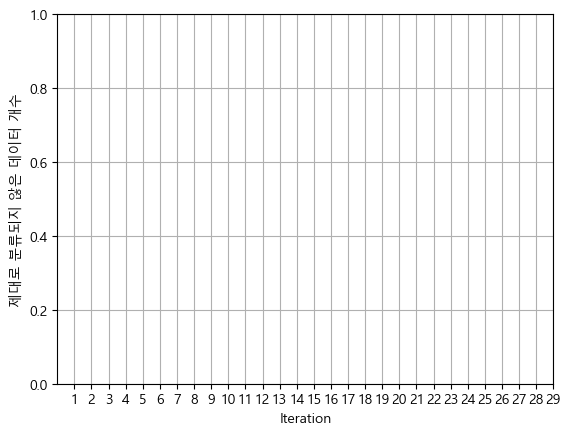

Accuracy :  0.9174528301886793


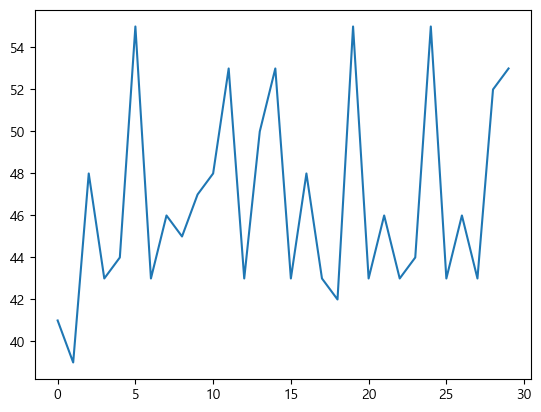

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


class Perceptron():

    def __init__(self, n_iter=1000):
        self.n_iter = n_iter

    def perceptronLearning(self, x, w):
        check_break = 0
        self.w = w

        for i in range(8143) :
            X_normalized = x[i][:4] / np.linalg.norm(x[i][:4])
            check = np.dot(self.w, x[i][:4])

            if x[i, 4] == 1 :
                if check <= 0 :
                    self.w += X_normalized
                    check_break +=1

            elif x[i, 4] == 0 : 
                if check > 0 :
                    self.w -= X_normalized
                    check_break +=1

        return w, check_break

    def predict(self, x, w):
        pred_class_list = []
        self.test_data = test_data

        for i in range(len(self.test_data)):
            check = np.dot(x[i, :4], w)
        
            if check > 0 :
                pred_class = 1.0
                pred_class_list.append(float(pred_class))
                
            else :
                pred_class = 0.0
                pred_class_list.append(float(pred_class))

        return pred_class_list


    def accuracy(self, x, y):
        train_data = x
        test_data = y
        train_data = np.insert(train_data, 3, 1, axis=1)
        check_break_list = []
        w = np.random.randn(4)

        for i in range (1000):
             w, check_break = self.perceptronLearning(train_data, w)

             if check_break == 0 :
                 break
             
             else :
                 if i < 30 : 
                    check_break_list.append(check_break)
                 check_break = 0

        plt.xlabel('Iteration')
        plt.ylabel('제대로 분류되지 않은 데이터 개수')
        plt.xticks(range(1, 30))
        plt.grid(True)
        plt.plot(check_break_list)
        plt.show()
        #print(check_break_list)

        test_data = np.insert(test_data, 3, 1, axis=1)

        preds = self.predict(test_data, w)
        label = test_data[:, 4].tolist()


        accuracy_score = 0.0
        for i in range (len(preds)):
            if preds[i] == label[i]:
                accuracy_score +=1.0

        accuracy = accuracy_score / float(len(preds))
        return accuracy
    


train_data = pd.read_table('datatraining.txt',sep=',')
test_data = pd.read_table('datatset2.txt',sep=',')

train_data = train_data[['Temperature','Light','CO2','Occupancy']]
test_data = test_data[['Temperature','Light','CO2','Occupancy']]

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

test = Perceptron()

accuracy = test.accuracy(train_data, test_data)
print('Accuracy : ', accuracy)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


class no_learn_Perceptron():

    def no_learn_predict(self, x):
        no_learn_pred_class_list = []
        w = np.random.randn(4)
        test_data = x

        for i in range(len(test_data)):
            check = np.dot(x[i, :4], w)
        
            if check > 0 :
                pred_class = 1.0
                no_learn_pred_class_list.append(float(pred_class))
                
            else :
                pred_class = 0.0
                no_learn_pred_class_list.append(float(pred_class))

        return no_learn_pred_class_list
    
    def no_learn_accuracy(self, x):
        preds = self.no_learn_predict(test_data)

        label = test_data[:, 4].tolist()


        accuracy_score = 0.0
        for i in range (len(preds)):
            if preds[i] == label[i]:
                accuracy_score +=1.0

        accuracy = accuracy_score / float(len(preds))

        return accuracy



train_data = pd.read_table('datatraining.txt',sep=',')
test_data = pd.read_table('datatset2.txt',sep=',')

train_data = train_data[['Temperature','Light','CO2','Occupancy']]
test_data = test_data[['Temperature','Light','CO2','Occupancy']]

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
test_data = np.insert(test_data, 3, 1, axis=1)

test = no_learn_Perceptron()

no_train_accuracy = test.no_learn_accuracy(test_data)
print('no_learn_Accuracy : ', no_train_accuracy)


no_learn_Accuracy :  0.05660377358490566


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False


class no_learn_Perceptron():

    def __init__(self, n_iter=1000):
        self.n_iter = n_iter

    def no_learn_predict(self, x):
        no_learn_pred_class_list = []
        w = np.random.random(4)

        test_data = x

        for i in range(len(test_data)):
            check = np.dot(x[i, :4], w)
            #print(check)
            if check > 0 :
                pred_class = 1.0
                no_learn_pred_class_list.append(float(pred_class))
                
            else :
                pred_class = 0.0
                no_learn_pred_class_list.append(float(pred_class))

        #print(no_learn_pred_class_list)
        return no_learn_pred_class_list
    
    def no_learn_accuracy(self, x):
        test_data = x 
        preds = self.no_learn_predict(test_data)
        
        label = test_data[:, 4].tolist()


        accuracy_score = 0.0
        for i in range (len(preds)):
            if preds[i] == label[i]:
                accuracy_score +=1.0

        no_train_accuracy = accuracy_score / float(len(preds))

        return no_train_accuracy



test_data = pd.read_table('datatset2.txt',sep=',')
test_data = test_data[['Temperature','Light','CO2','Occupancy']]

test_data = test_data.to_numpy()
test_data = np.insert(test_data, 3, 1, axis=1)

#print(test_data)
test = no_learn_Perceptron()
no_train_accuracy = test.no_learn_accuracy(test_data)
print('no_learn_Accuracy : ', no_train_accuracy)


no_learn_Accuracy :  0.7898892534864643
